Telecom Churn Prediction - Starter Notebook

The goal of this prohject is to create a churn study



0. Problem statement
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, we will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn, and identify the main indicators of churn.

In this competition, our goal is to build a machine learning model that is able to predict churning customers based on the features provided for their usage.

Customer behaviour during churn:
**bold text****bold text**
Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are three phases of customer lifecycle :

The ‘good’ phase: In this phase, the customer is happy with the service and behaves as usual.

# The ‘action’ phase: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. It is crucial to identify high-churn-risk customers in this **phase**, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

The ‘churn’ phase: In this phase, the customer is said to have churned. In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month (September) is the ‘churn’ phase.

# 1. Loading dependencies & datasets

Lets start by loading our dependencies. We can keep adding any imports to this cell block, as we write mode and mode code.

In [ ]:
# Step 1: Install missing libraries (optional, only if needed)
!pip install missingno --quiet  # for visualizing missing values

In [ ]:
# Step 1a: Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Make plots look nicer
sns.set_style('whitegrid')
%matplotlib inline


In [ ]:
# Step 1b: Mount Google Drive
# ------------------------------
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

# ------------------------------
# Step 1c: Load CSVs from Drive
# ------------------------------
# Replace <your-folder-path> with the folder in Drive where your CSVs are
# Example: "/content/drive/MyDrive/ChurnProject/train.csv"

train = pd.read_csv("/content/drive/MyDrive/train.csv")
test = pd.read_csv("/content/drive/MyDrive/test.csv")

In [ ]:
# ------------------------------
# Step 1d: Quick preview
# ------------------------------
print("Train shape:", train.shape)
print("Test shape:", test.shape)
train.head()

Train shape: (69999, 172)
Test shape: (30000, 171)


,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


# 2. Create X, y and then Train test split

Lets create X and y datasets and skip "circle_id" since it has only 1 unique value

In [ ]:
# Assuming 'circle_id' is the ID column
X = train.drop(columns=['circle_id']).iloc[:,:-1]  # drop ID and exclude target
y = train.iloc[:,-1]  # last column is target

# Train-test split
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("y_train distribution:\n", y_train.value_counts(normalize=True))
X_train.head()


X_train shape: (55999, 170)
X_val shape: (14000, 170)
y_train distribution:
 churn_probability
0    0.898105
1    0.101895
Name: proportion, dtype: float64


,id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
38032,38032,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,92.610,320.271,391.980,...,0,0,0,NaN,NaN,0.0,846,0.00,0.0,0.0
69689,69689,0.0,0.0,0.0,6/30/2014,7/31/2014,NaN,298.625,45.560,0.000,...,0,0,0,0.0,NaN,NaN,462,0.00,0.0,0.0
8224,8224,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,196.111,203.800,486.918,...,0,0,0,0.0,NaN,NaN,1006,0.00,0.0,0.0
40850,40850,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,139.321,157.021,159.608,...,0,0,0,NaN,NaN,NaN,502,0.00,0.0,0.0
69476,69476,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,210.940,183.400,198.260,...,0,0,0,NaN,NaN,1.0,2305,5.35,0.0,0.0


Missing values per column:

id                          0
loc_og_t2o_mou            574
std_og_t2o_mou            574
loc_ic_t2o_mou            574
last_date_of_month_6        0
                        ...  
fb_user_8               41306
aon                         0
aug_vbc_3g                  0
jul_vbc_3g                  0
jun_vbc_3g                  0
Length: 170, dtype: int64

Missing values after imputation:

id                      0
loc_og_t2o_mou          0
std_og_t2o_mou          0
loc_ic_t2o_mou          0
last_date_of_month_6    0
                       ..
fb_user_8               0
aon                     0
aug_vbc_3g              0
jul_vbc_3g              0
jun_vbc_3g              0
Length: 170, dtype: int64


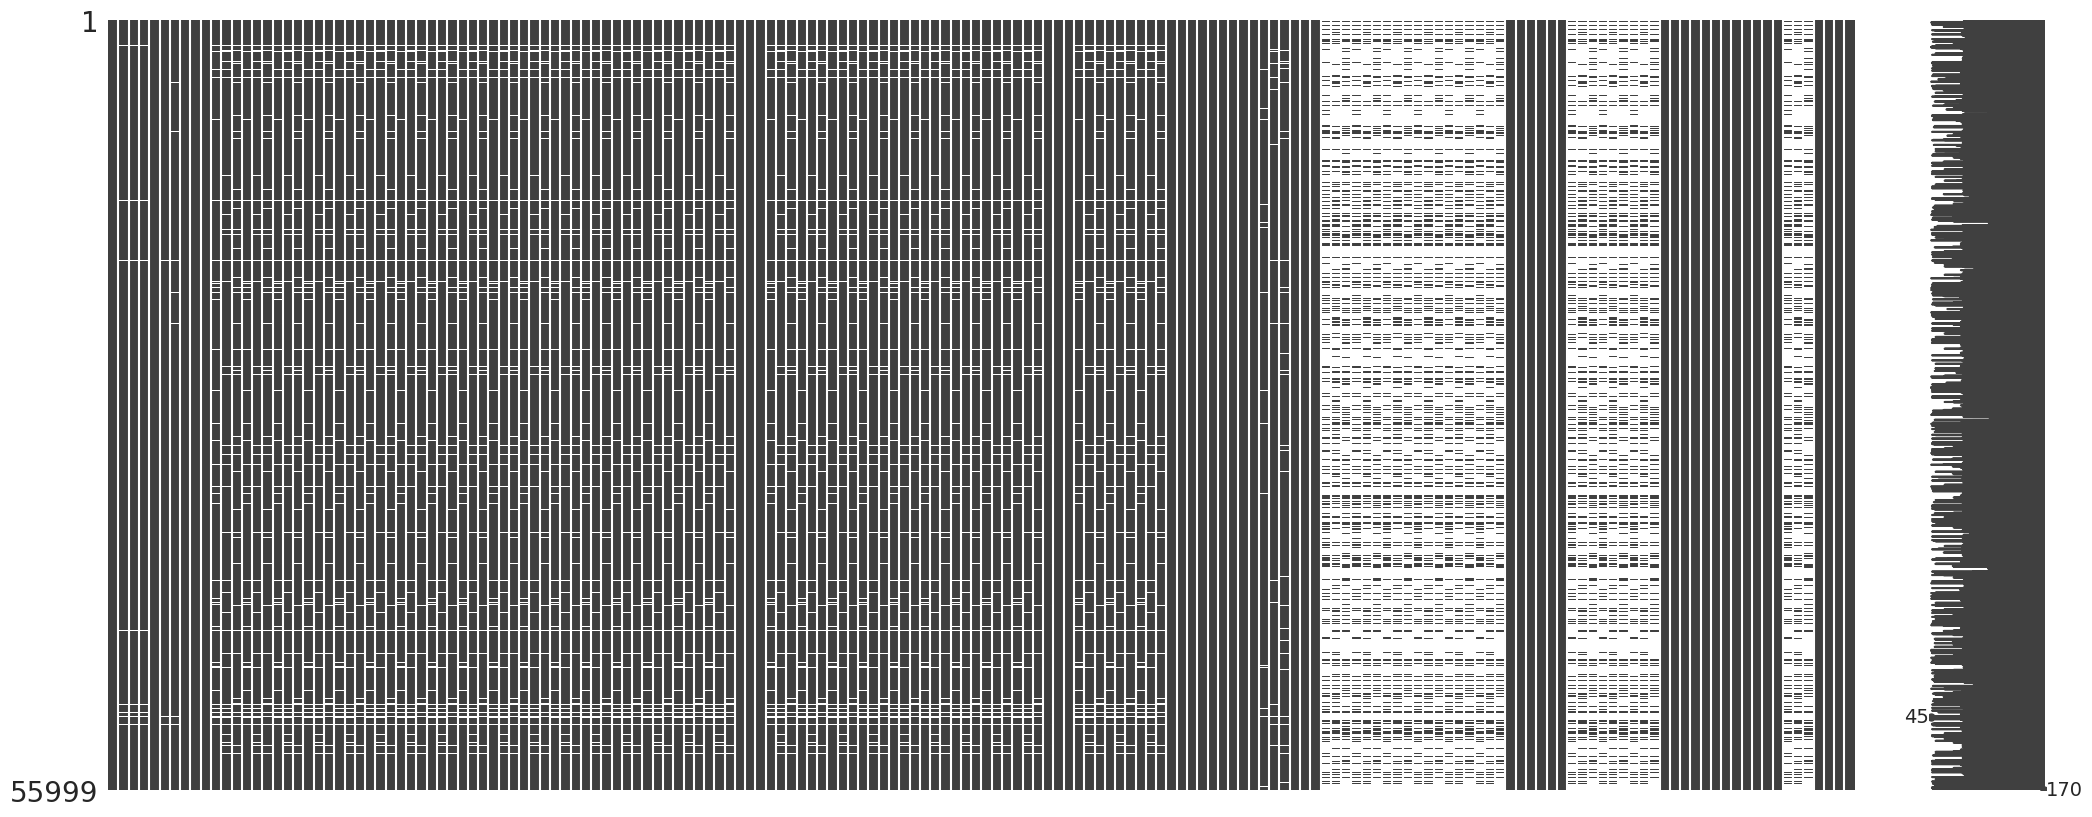

In [ ]:
# ------------------------------
# Step 3: Handling Missing Data
# ------------------------------

# 3a. Check for missing values
print("Missing values per column:\n")
print(X_train.isnull().sum())

# visualize missing data for sanity
import missingno as msno
msno.matrix(X_train)  # Shows where missing values are

# 3b. Decide how to fill missing values
# Numerical columns → fill with mean
# Categorical columns → fill with mode
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X_train.select_dtypes(include=['object']).columns

from sklearn.impute import SimpleImputer

# Numerical imputer
num_imputer = SimpleImputer(strategy='mean')
X_train[num_cols] = num_imputer.fit_transform(X_train[num_cols])
X_val[num_cols] = num_imputer.transform(X_val[num_cols])

# Categorical imputer
cat_imputer = SimpleImputer(strategy='most_frequent')
X_train[cat_cols] = cat_imputer.fit_transform(X_train[cat_cols])
X_val[cat_cols] = cat_imputer.transform(X_val[cat_cols])

# Quick check to confirm no missing values remain
print("\nMissing values after imputation:\n")
print(X_train.isnull().sum())


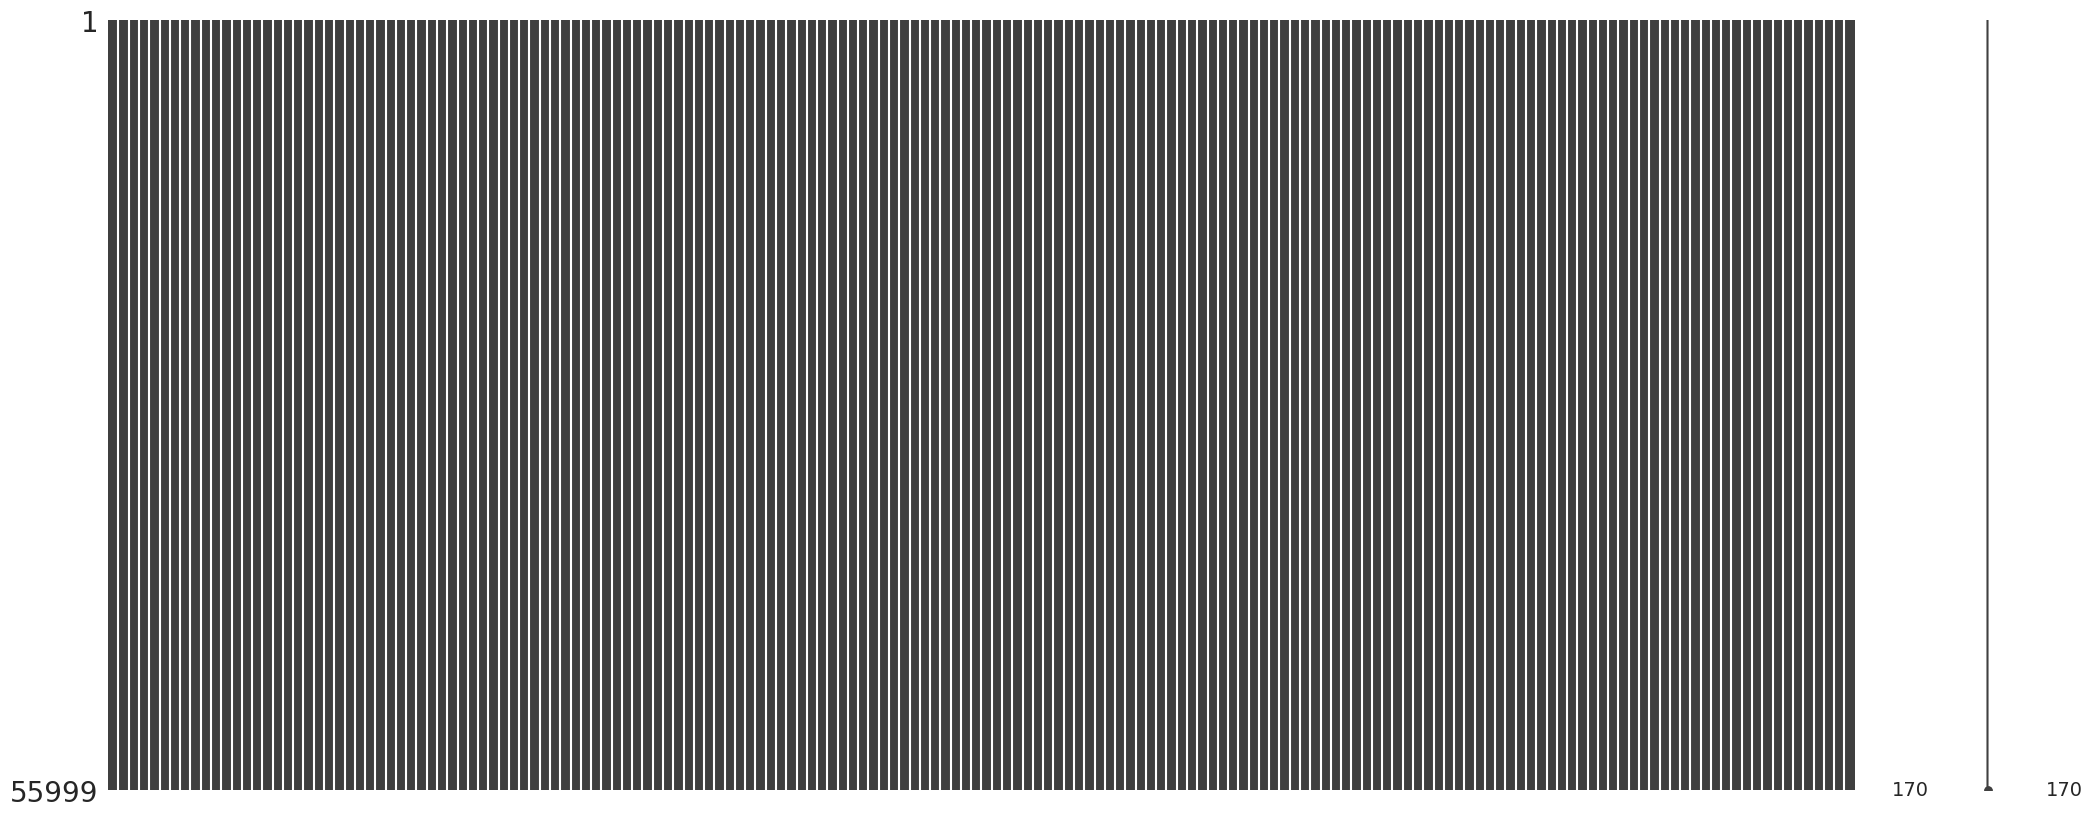

In [ ]:
import matplotlib.pyplot as plt
import missingno as msno

# Visualize missing values properly
msno.matrix(X_train)
plt.show()  # This forces Colab to render the plot


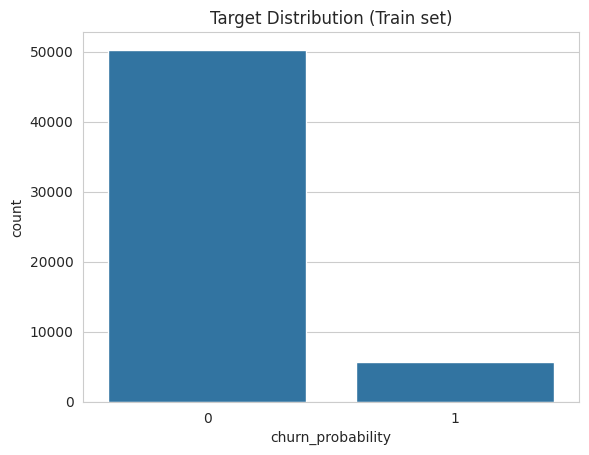

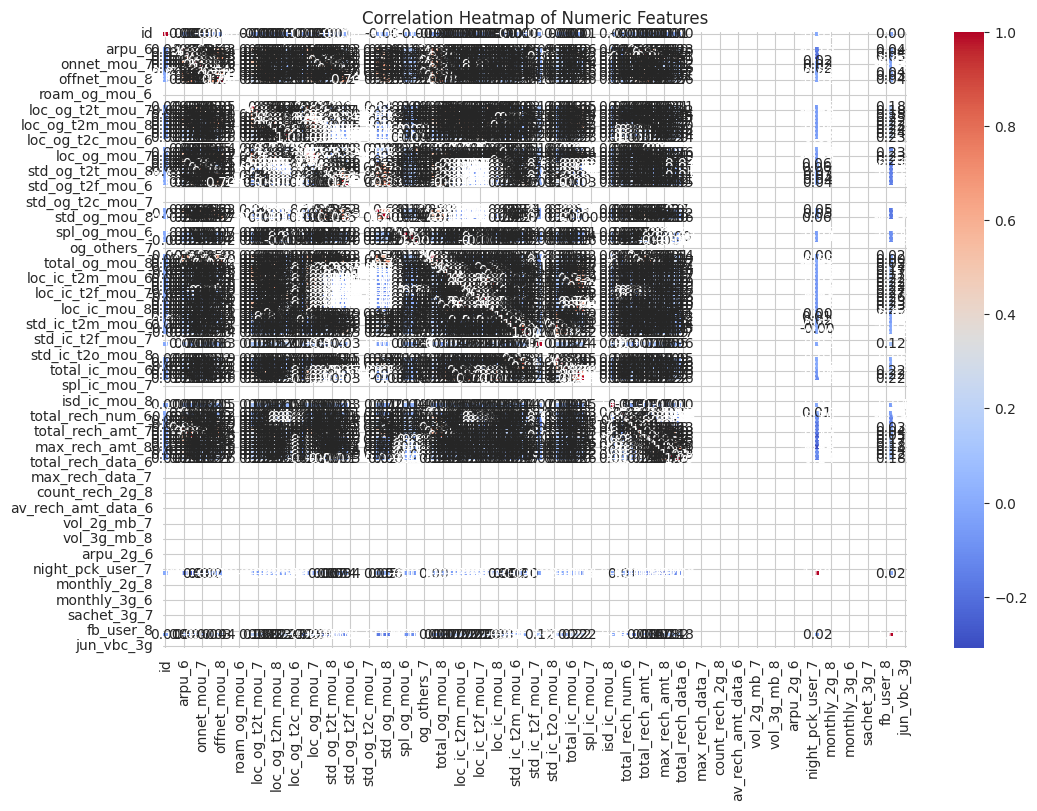

In [ ]:
# ------------------------------
# Step 4: EDA & Preprocessing
# ------------------------------

# 4a. Handling outliers (optional but recommended)
# We'll use IQR method for numeric columns
for col in num_cols:
    Q1 = X_train[col].quantile(0.25)
    Q3 = X_train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    X_train[col] = X_train[col].clip(lower, upper)  # cap extreme values
    X_val[col] = X_val[col].clip(lower, upper)

# 4b. Feature scaling
# Standardize numeric features to mean=0, std=1
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_val[num_cols] = scaler.transform(X_val[num_cols])

# 4c. Basic EDA: target distribution
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x=y_train)
plt.title("Target Distribution (Train set)")
plt.show()

# Correlation heatmap for better visualization
plt.figure(figsize=(12,8))
sns.heatmap(X_train[num_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# 5a. Encode categorical variables
if len(cat_cols) > 0:
    # Use sparse_output instead of sparse
    ohe = OneHotEncoder(sparse_output=False, drop='first')

    # Fit on train, transform both train and validation
    X_train_cat = ohe.fit_transform(X_train[cat_cols])
    X_val_cat = ohe.transform(X_val[cat_cols])

    # Convert back to DataFrame with column names
    ohe_cols = ohe.get_feature_names_out(cat_cols)
    X_train_cat = pd.DataFrame(X_train_cat, columns=ohe_cols, index=X_train.index)
    X_val_cat = pd.DataFrame(X_val_cat, columns=ohe_cols, index=X_val.index)

    # Drop original categorical columns and add encoded ones
    X_train = X_train.drop(columns=cat_cols).join(X_train_cat)
    X_val = X_val.drop(columns=cat_cols).join(X_val_cat)

print("Final X_train shape after encoding:", X_train.shape)
print("Final X_val shape after encoding:", X_val.shape)


Final X_train shape after encoding: (55999, 339)
Final X_val shape after encoding: (14000, 339)


In [ ]:
# ------------------------------
# Step 6: Model Building
# ------------------------------

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Dictionary to store models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    print(f"--- {name} ---")
    print("Accuracy:", accuracy_score(y_val, y_pred))
    print("Classification Report:\n", classification_report(y_val, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
    print("\n")


--- Logistic Regression ---
Accuracy: 0.929
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96     12574
           1       0.77      0.43      0.55      1426

    accuracy                           0.93     14000
   macro avg       0.85      0.71      0.76     14000
weighted avg       0.92      0.93      0.92     14000

Confusion Matrix:
 [[12387   187]
 [  807   619]]


--- Random Forest ---
Accuracy: 0.9391428571428572
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97     12574
           1       0.79      0.55      0.65      1426

    accuracy                           0.94     14000
   macro avg       0.87      0.77      0.81     14000
weighted avg       0.93      0.94      0.93     14000

Confusion Matrix:
 [[12365   209]
 [  643   783]]




/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:39:54] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


--- XGBoost ---
Accuracy: 0.9367857142857143
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97     12574
           1       0.74      0.58      0.65      1426

    accuracy                           0.94     14000
   macro avg       0.85      0.78      0.81     14000
weighted avg       0.93      0.94      0.93     14000

Confusion Matrix:
 [[12282   292]
 [  593   833]]




In [ ]:
# ------------------------------
# Step 7: Creating Submission File
# ------------------------------

# 7a. Make sure test data has the same preprocessing as train
# Handle missing values
X_test = test.drop(columns=['circle_id'], errors='ignore')  # drop ID column if present

# Impute missing values
X_test[num_cols] = num_imputer.transform(X_test[num_cols])
if len(cat_cols) > 0:
    X_test[cat_cols] = cat_imputer.transform(X_test[cat_cols])

# One-hot encode categorical features
if len(cat_cols) > 0:
    X_test_cat = ohe.transform(X_test[cat_cols])
    X_test_cat = pd.DataFrame(X_test_cat, columns=ohe.get_feature_names_out(cat_cols), index=X_test.index)
    X_test = X_test.drop(columns=cat_cols).join(X_test_cat)

# Scale numeric features
X_test[num_cols] = scaler.transform(X_test[num_cols])

# Align features with training set (some columns might be missing in test)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# 7b. Use the best model to predict
best_model = models['XGBoost']  # pick your best performing model
y_test_pred = best_model.predict(X_test)

# 7c. Create submission DataFrame
submission = pd.DataFrame({
    'circle_id': test['circle_id'] if 'circle_id' in test.columns else range(len(test)),
    'churn_prediction': y_test_pred
})

# 7d. Save to CSV
submission.to_csv("churn_submission.csv", index=False)
print("Submission file created: churn_submission.csv")


Submission file created: churn_submission.csv


In [ ]:
from google.colab import files

# Download the submission CSV
files.download("churn_submission.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

QUick checks and sanity steps

In [ ]:
from sklearn.metrics import accuracy_score
print("Validation accuracy (XGBoost):", accuracy_score(y_val, best_model.predict(X_val)))


Validation accuracy (XGBoost): 0.9367857142857143


In [29]:
#checking target values
y_test_pred = y_test_pred.astype(int)

In [30]:
#backup for safety
submission.to_csv("/content/drive/MyDrive/churn_submission_backup.csv", index=False)